## Autoencoder Analysis

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

from models.AE import Autoencoder
from utils.loaders import load_mnist, load_model

### Params

In [3]:
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

### Load the data

In [4]:
(x_train, y_train), (x_test, y_test) = load_mnist()

### Load the model architecture

In [5]:
AE = load_model(Autoencoder, RUN_FOLDER)

### Reconstructing orginal paintings

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


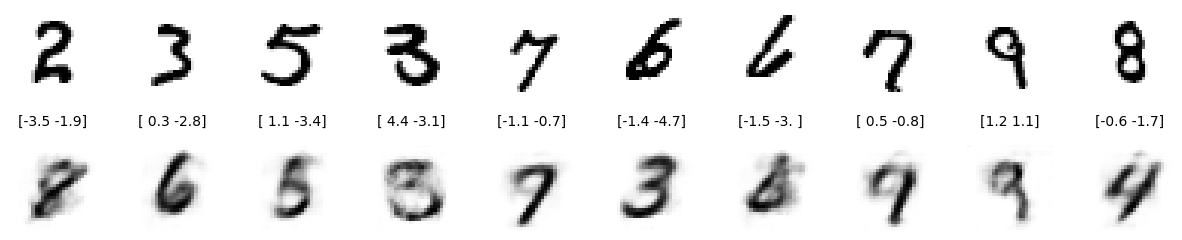

In [6]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

# plotting orginal and reconstructed images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

### Generating a scatter plot of latent space points.

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


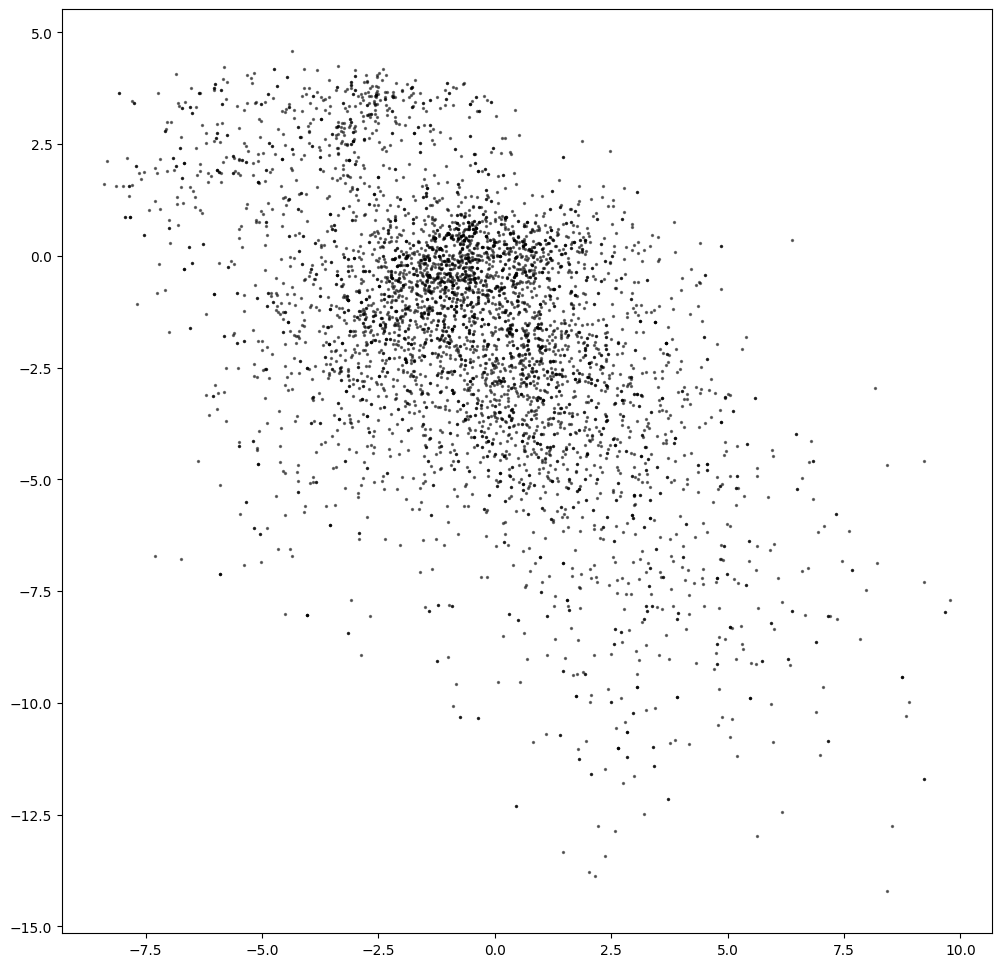

In [7]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], c='black', alpha=0.5, s=2)

### Using a dense grid in latent space to visualize decoder output.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


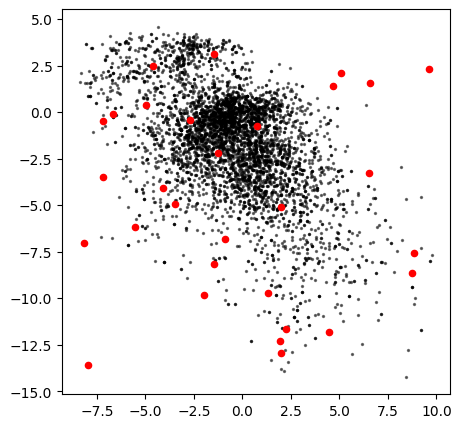

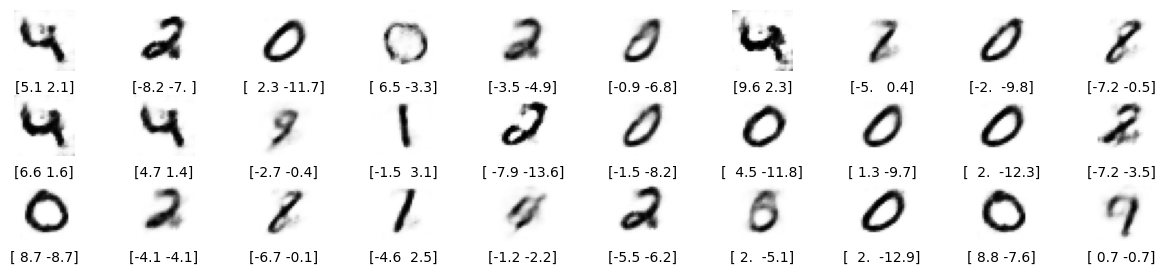

In [9]:
figsize = 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x, max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y, max_y, size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)

# Plotting reconstructed images from various points n the latent space
plt.scatter(z_grid[:, 0], z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i], 1)), fontsize=10, ha='center', transform=ax.transAxes)

    ax.imshow(reconst[i, :, :, 0], cmap= 'Greys')

### Using a continuous color mapping to visualize clustering of digits based on labels.

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


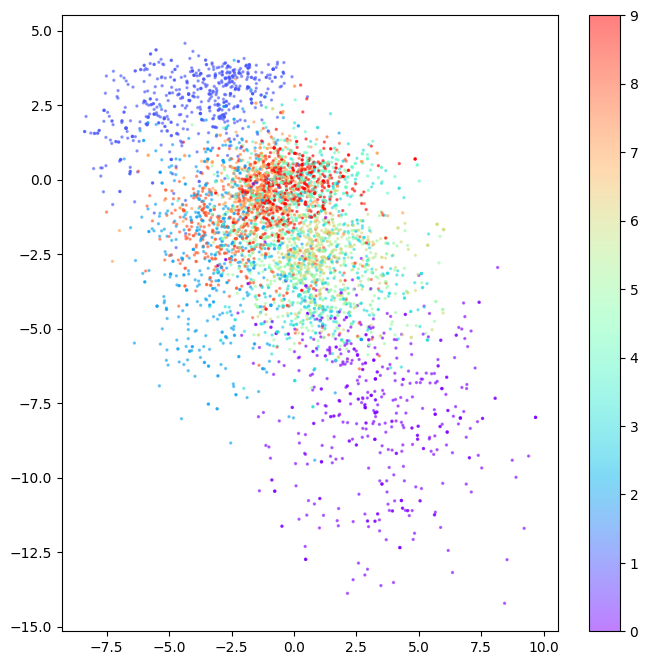

In [10]:
n_to_show = 5000
grid_size = 15
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()
plt.show()

### Visualisation of latent space and the reconstructor capabilities of the decoder.

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


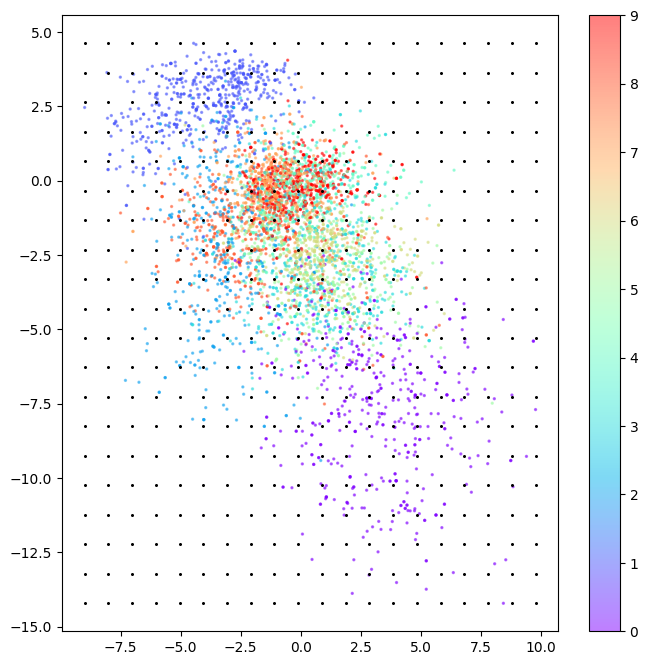

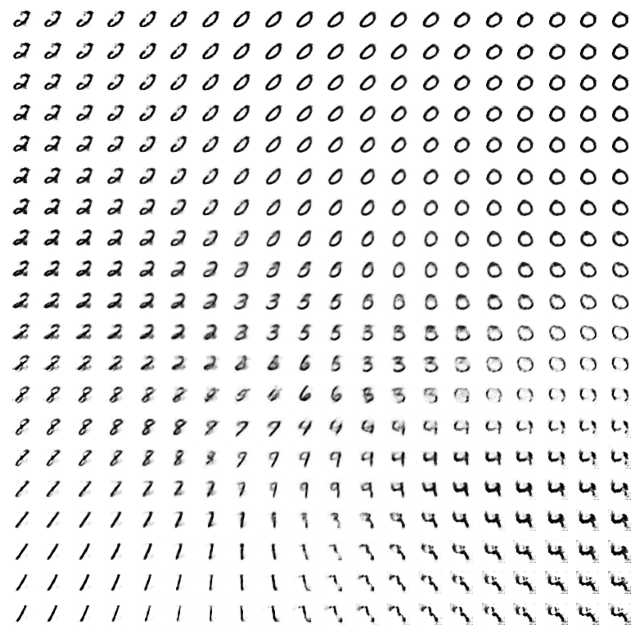

In [19]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

# Plotting the latent space as a scatter plot, color-coded by the actual digit labels to see clusters.
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()

# Creating a grid of points in latent space to see how the decoder reconstructs at these points.
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(min(z_points[:, 1]), max(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten() # Flattening the grid matrix to a vector for processing.
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv))) # Creating pairs of (x, y) coordinates in latent space.

# Using the decoder to reconstruct images from the grid points in latent space.
reconst = AE.decoder.predict(z_grid)

# Plotting the grid points to visually inspect the distribution and density in latent space.
plt.scatter(z_grid[:, 0], z_grid[:, 1], c = 'black', alpha=1, s=1.4)
plt.show()

# Setting up a plot for visualizing reconstructed images from the latent space grid.
fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :, :, 0], cmap = 'Greys')